<a href="https://colab.research.google.com/github/AlbertFlorinus/mnistcnn/blob/active-labs/active_labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b active-labs https://github.com/AlbertFlorinus/mnistcnn

Cloning into 'mnistcnn'...
remote: Enumerating objects: 7244, done.
remote: Counting objects: 100% (6044/6044), done.
remote: Compressing objects: 100% (5297/5297), done.
remote: Total 7244 (delta 773), reused 5910 (delta 685), pack-reused 1200
Receiving objects: 100% (7244/7244), 139.19 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (1083/1083), done.
Checking out files: 100% (5210/5210), done.


In [2]:
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt
from cv2 import cv2
import keras
import numpy as np
from keras.preprocessing import image
import math
from scipy import ndimage

In [3]:
py_file_location = "/content/mnistcnn/scripts"
sys.path.append(os.path.abspath(py_file_location))

In [4]:
from model_functions import Run

In [5]:
model = keras.models.load_model("/content/mnistcnn/ALnet-3.0.h5")

In [6]:
global MODEL
MODEL = Run(model)

In [7]:
result = MODEL.predict_chosen("/content/mnistcnn/digits/2IMG_0623.JPG", debug=True)

In [8]:
labels_process = {0: "Grayscale", 1: "Dilate", 2: "Median blur", 3: "Grayscale-Medianblur absdiff", 
                  4: "threshold", 5:"Invert and resize", 6: "adaptive thresh", 7: "thresh"}

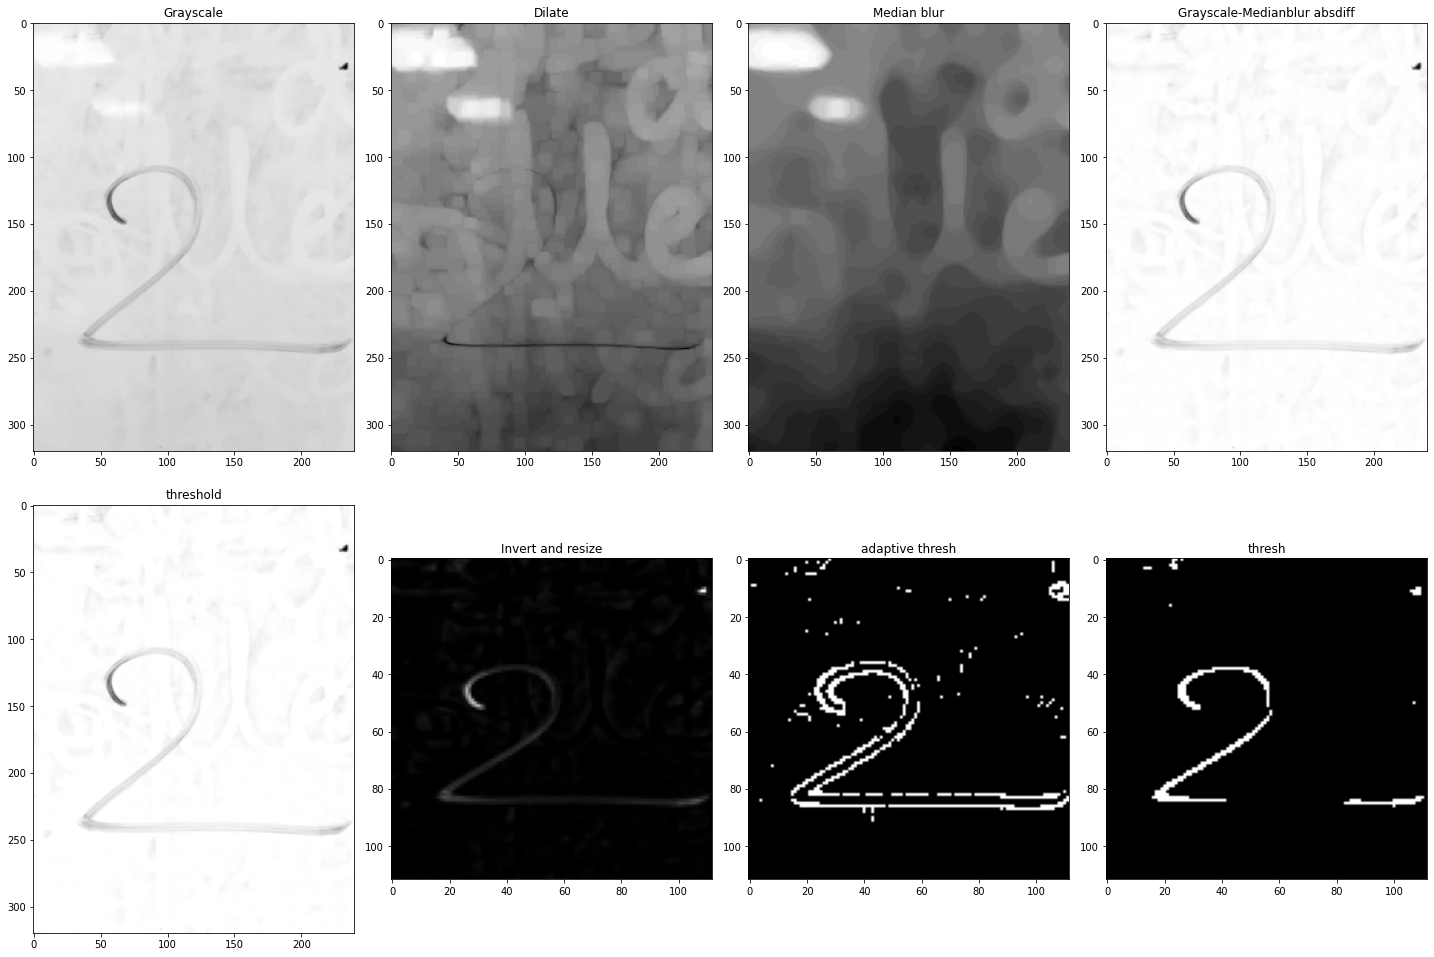

In [9]:
fig = plt.figure(figsize=(20,20))
columns = 4
rows = 3
plt.gray()
for i, j in enumerate(result["processing"]):
    try:
        fig.add_subplot(rows, columns, i+1).set_title(labels_process[i])
        plt.imshow(j)
    except Exception as ex:
        print(ex)
fig.tight_layout()
plt.show()

In [10]:
def processings_steps(filename):
    result = MODEL.predict_chosen(f"/content/mnistcnn/digits/{filename}", debug=True)
    labels_process = {0: "Grayscale", 1: "Dilate", 2: "Median blur", 3: "Grayscale-Medianblur absdiff", 
                  4: "threshold", 5:"Invert and resize", 6: "adaptive thresh", 7: "thresh"}
    fig = plt.figure(figsize=(20,20))
    columns = 4
    rows = 3
    plt.gray()
    for i, j in enumerate(result["processing"]):
        try:
            fig.add_subplot(rows, columns, i+1).set_title(labels_process[i])
            plt.imshow(j)
        except Exception as ex:
            print(ex)
    fig.tight_layout()
    plt.show()
    


In [12]:
def wrong_predictions(results):
    wrongs = {}
    for i in results.keys():
        if int(i[0]) != results[i]["classname"]:
            wrongs[i]=results[i]
    return wrongs

In [13]:
results = MODEL.predict_folder("/content/mnistcnn/digits")

In [14]:
x = wrong_predictions(results)

In [15]:
subjects = list(x.keys())

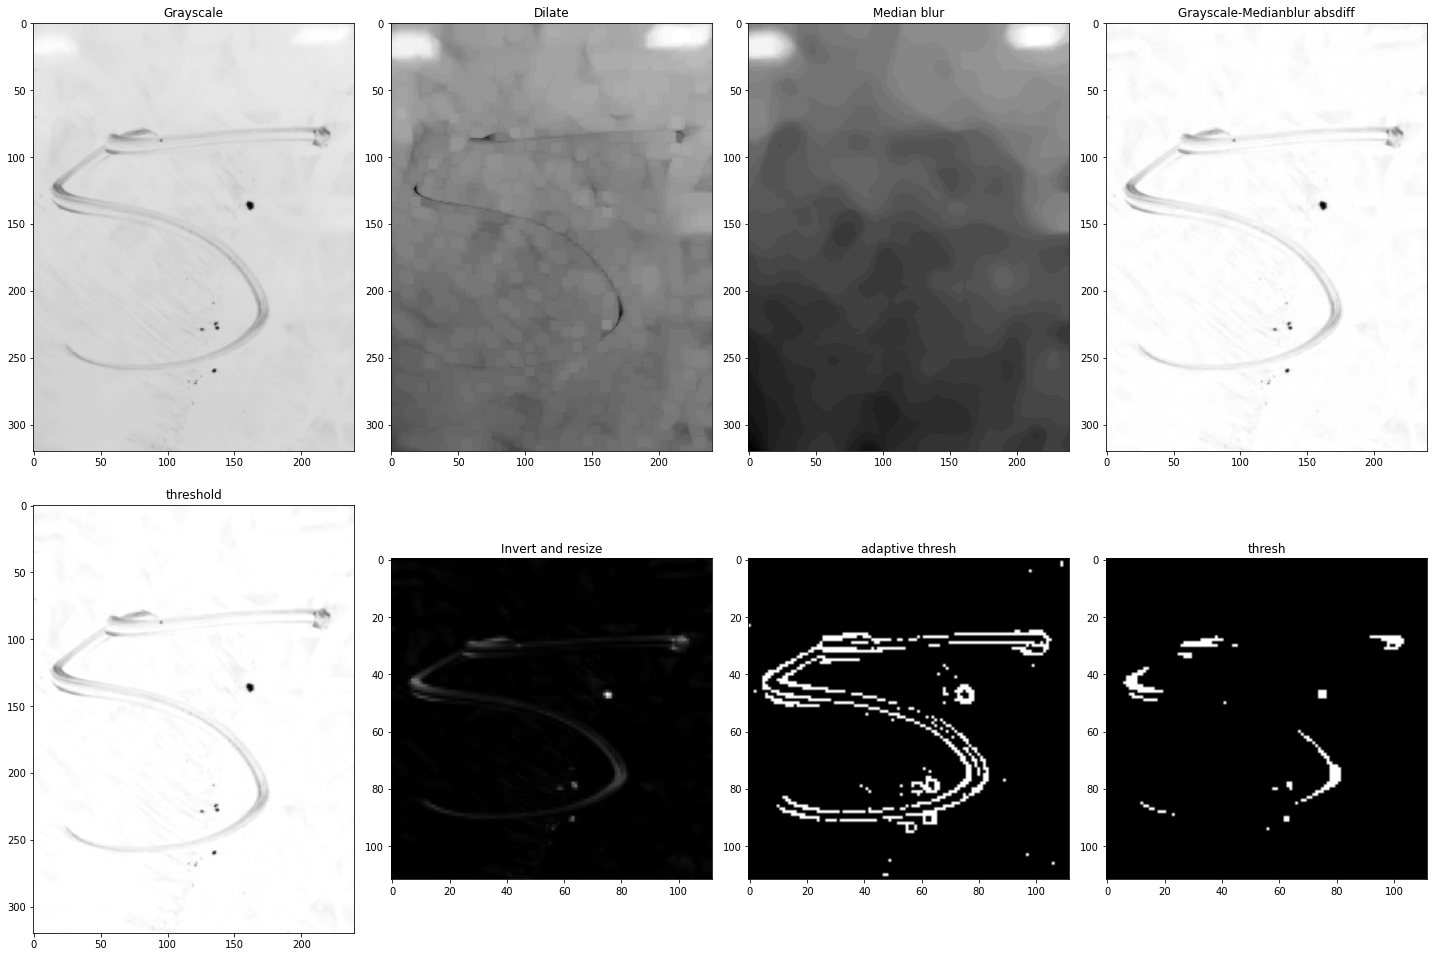

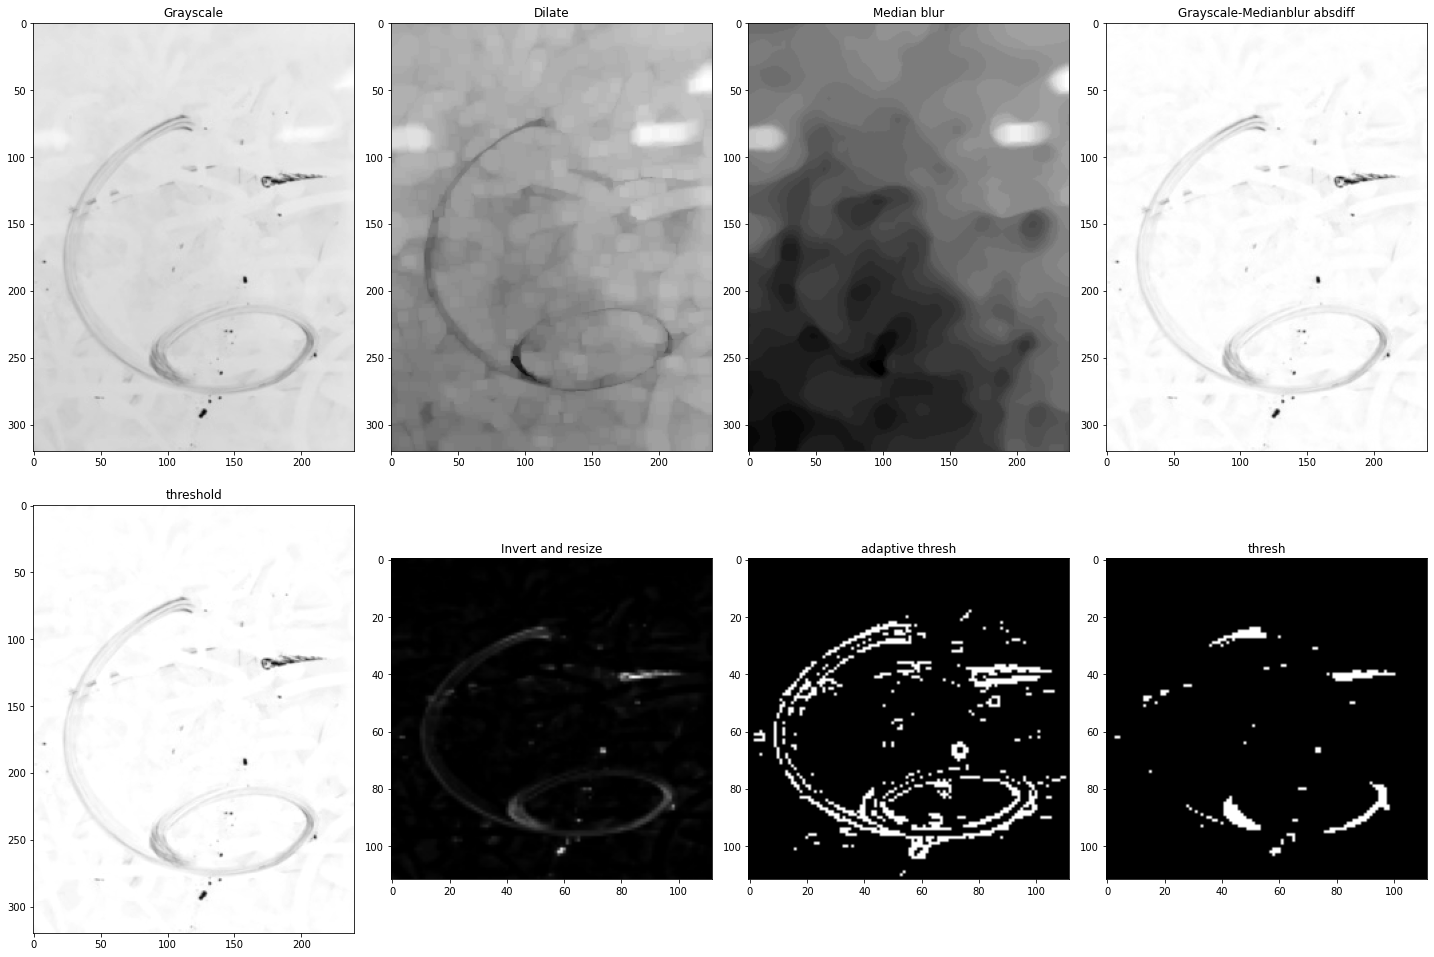

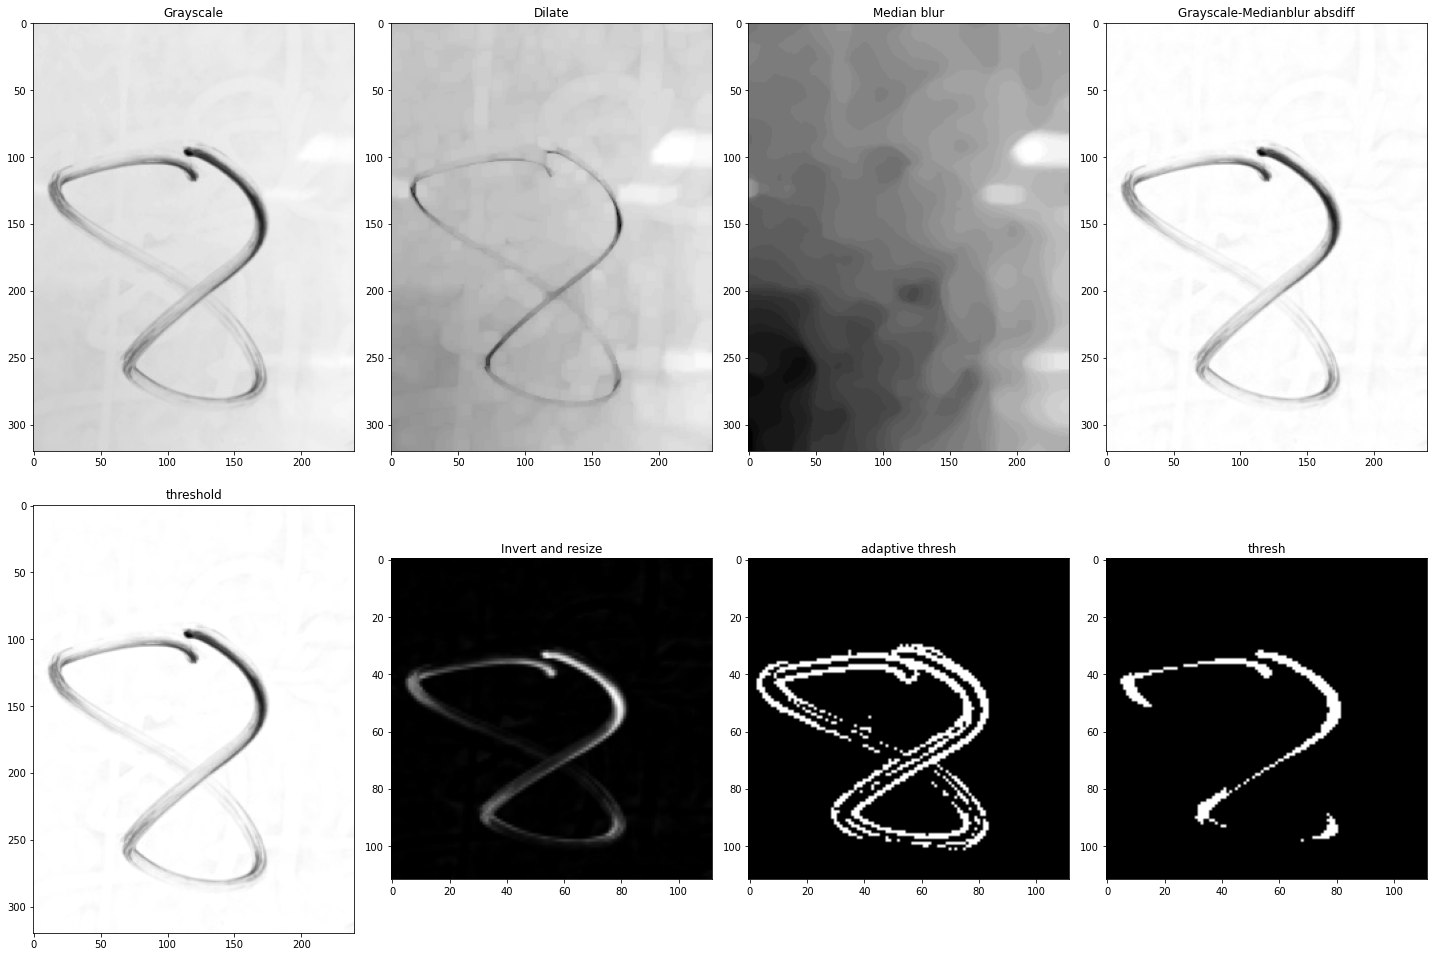

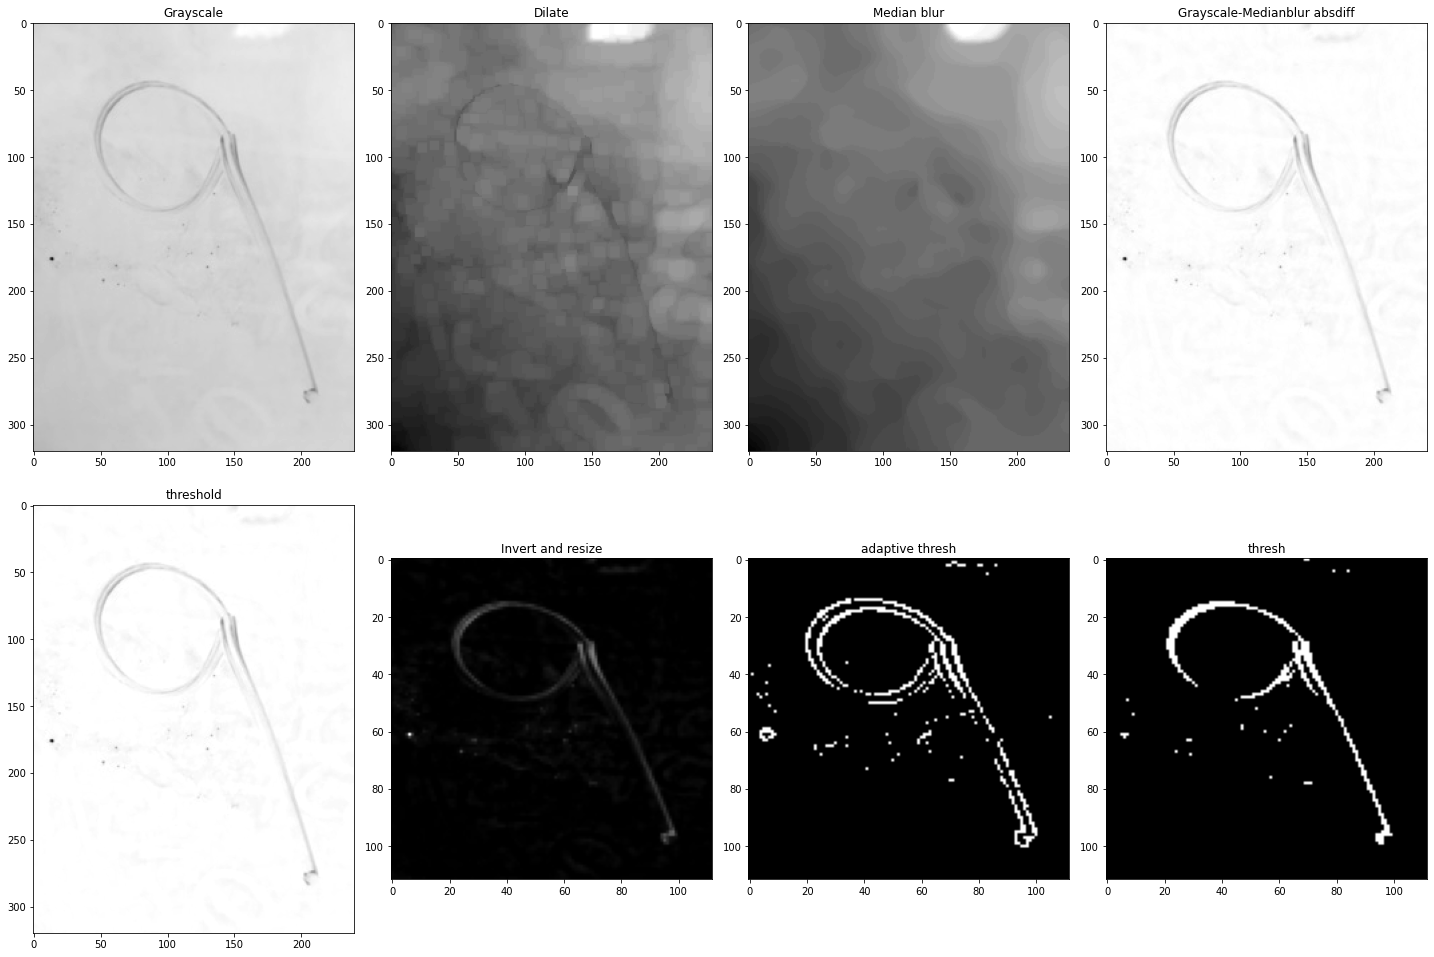

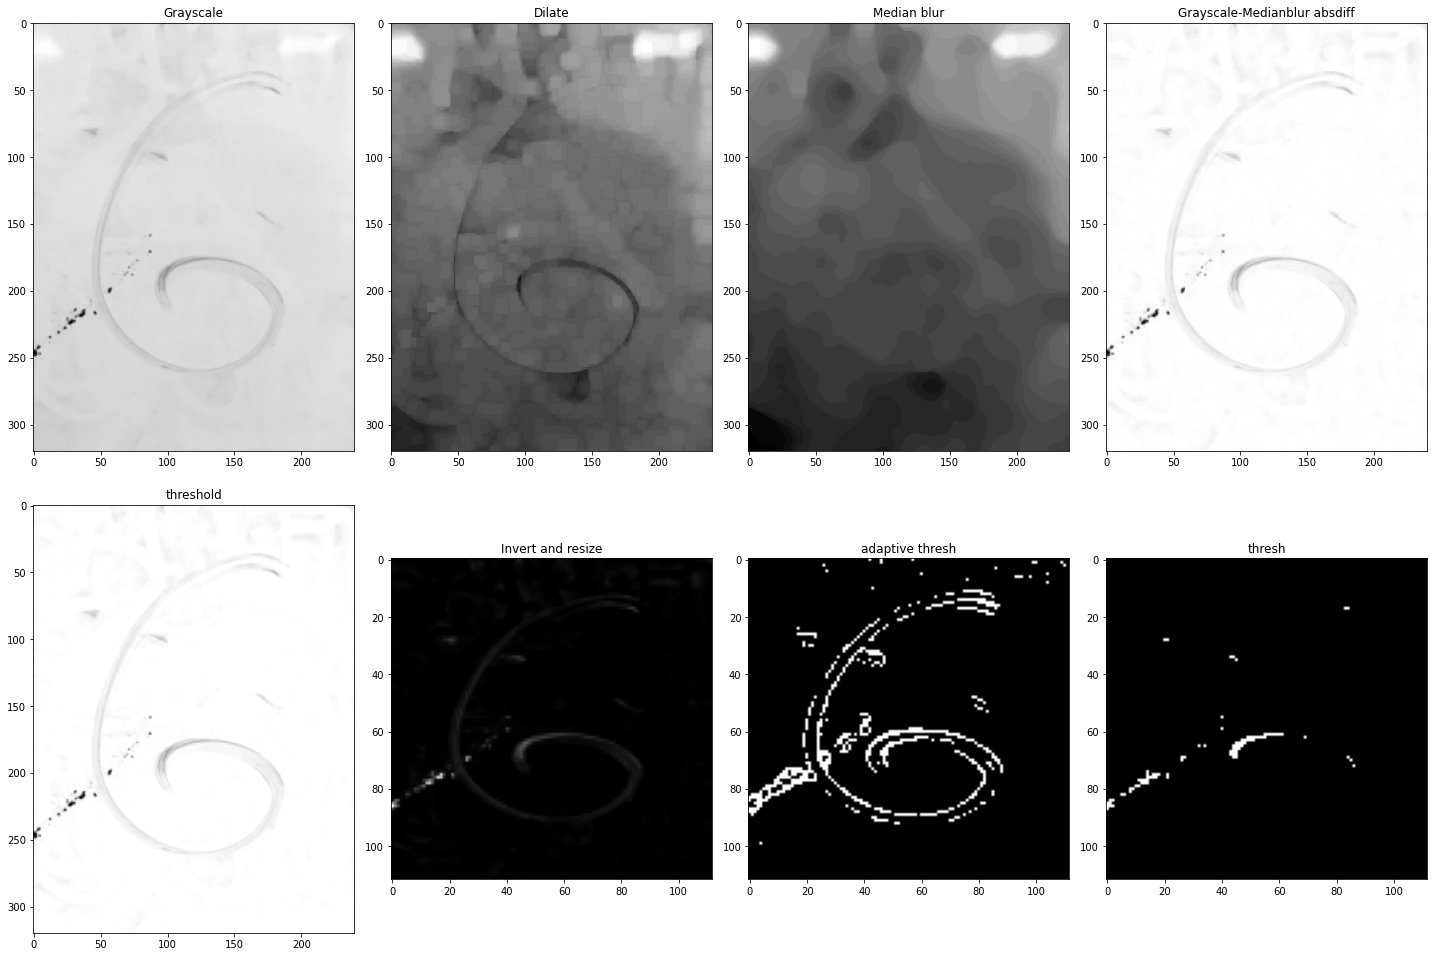

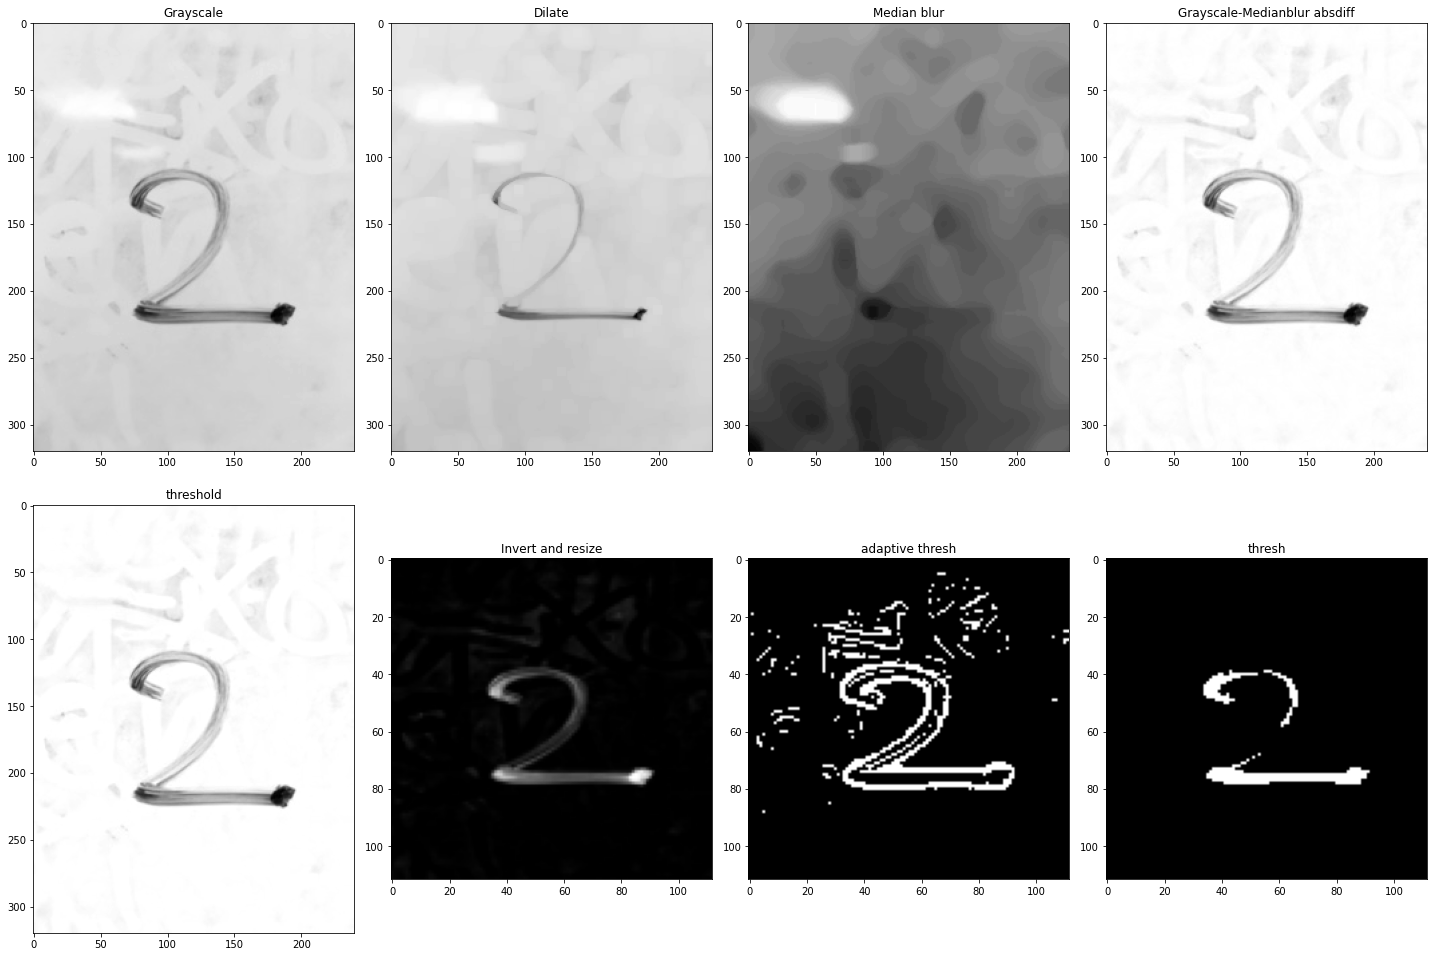

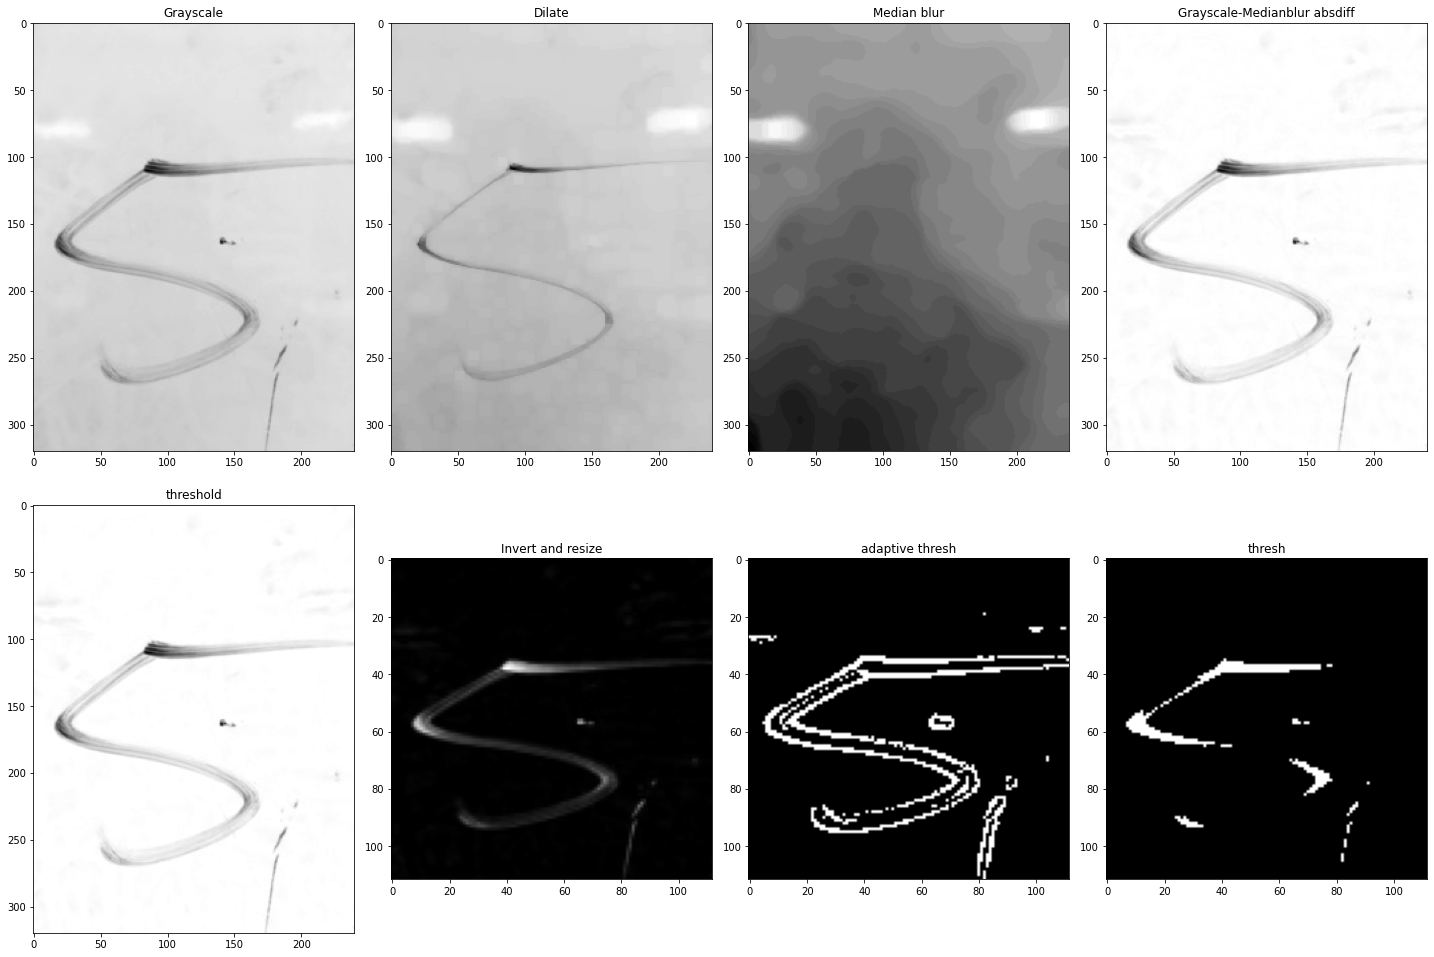

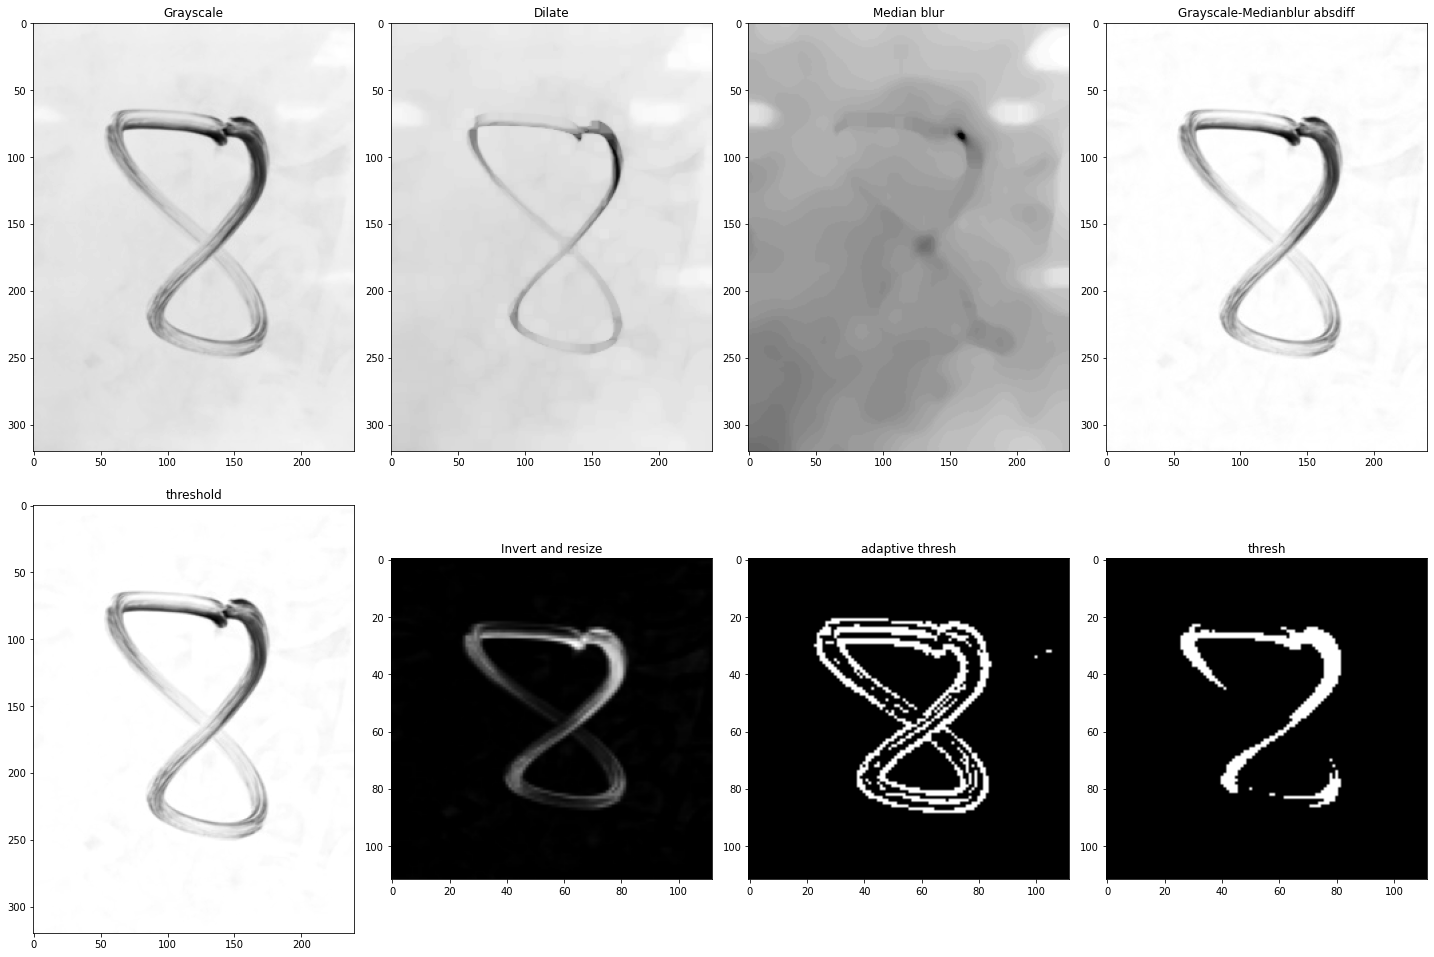

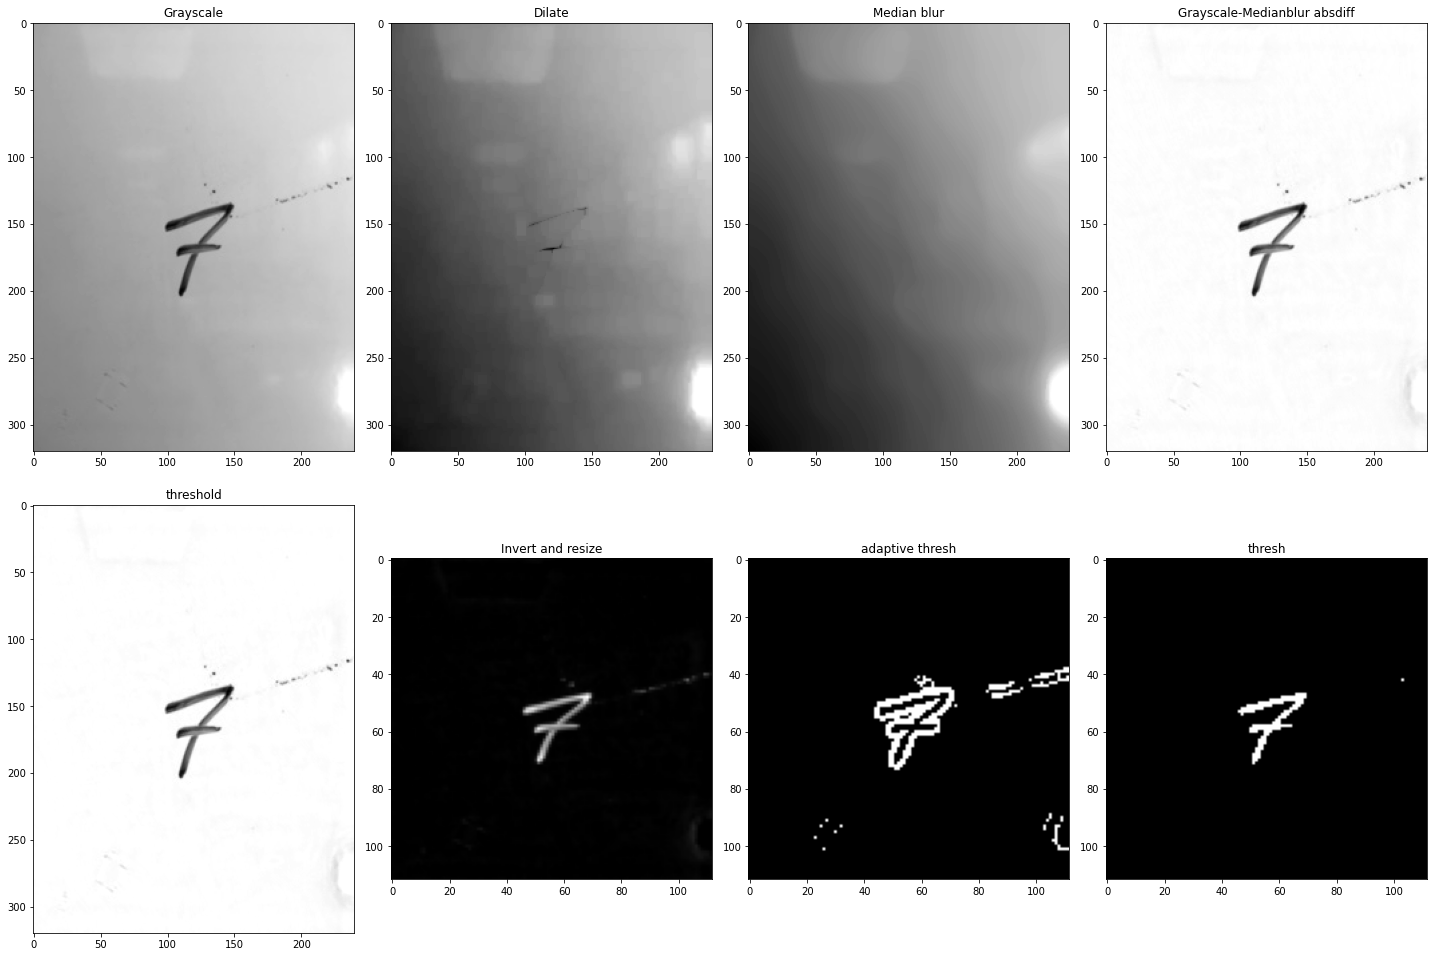

In [17]:
#plots the preprocessing stages on the misclassifications
for i in subjects:
    processings_steps(i)

In [18]:
print(MODEL)


Structure of Alnet-3.0
(None, 56, 56, 16)
(None, 28, 28, 16)
(None, 26, 26, 32)
(None, 26, 26, 32)
(None, 24, 24, 32)
(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 12, 12, 32)
(None, 12, 12, 32)
(None, 10, 10, 64)
(None, 10, 10, 64)
(None, 8, 8, 64)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 4, 4, 64)
(None, 4, 4, 64)
(None, 1024)
(None, 128)
(None, 128)
(None, 128)
(None, 10)
